In [7]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
accurate_predictions = {
    "BART-large" : {
        "Liberal" : 230,
        "Conservative" : 75
    },

    "BERT-base" : {
        "Liberal" : 142,
        "Conservative" : 270
    },

    "DeBERTa" : {
        "Liberal" : 63,
        "Conservative" : 134
    },

    # TODO; waiting on OpenAI servers to come back

    "GPT-4" : {
        "Liberal" : 205,
        "Conservative" : 184
    },

    "GPT-4o" : {
        "Liberal" : 198,
        "Conservative" : 214
    },

    "GPT-4o mini" : {
        "Liberal" : 179,
        "Conservative" : 86
    },

    # "LLaMa" : {
    #     "Liberal" : 20,
    #     "Conservative" : 20
    # }
}

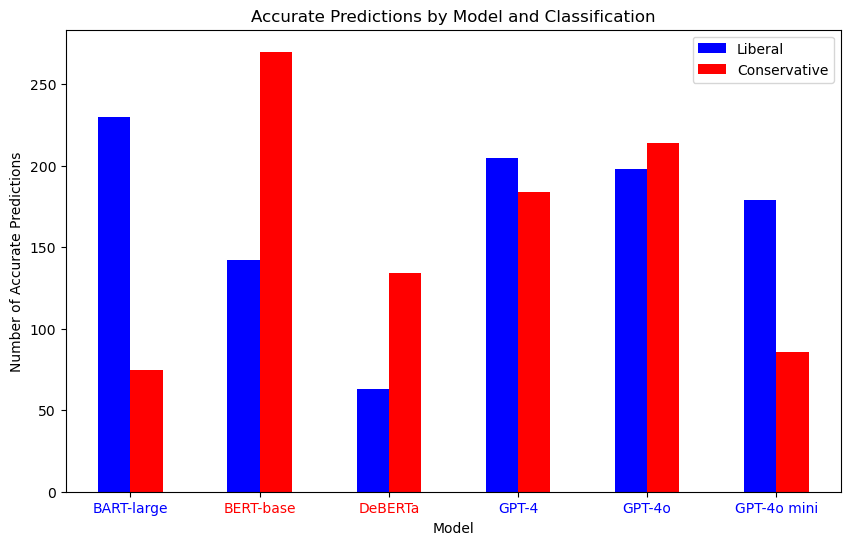

In [9]:
df = pd.DataFrame(accurate_predictions).T
label_colors = ["blue", "red", "red", "blue", "blue", "blue", "red"]

df.plot(kind='bar', figsize=(10, 6), color=["blue", "red"])
plt.title('Accurate Predictions by Model and Classification')
plt.xlabel('Model')
plt.ylabel('Number of Accurate Predictions')
plt.xticks(rotation=360)
plt.legend()

for i, label in enumerate(plt.gca().get_xticklabels()):
    label.set_color(label_colors[i % len(label_colors)])

plt.show()

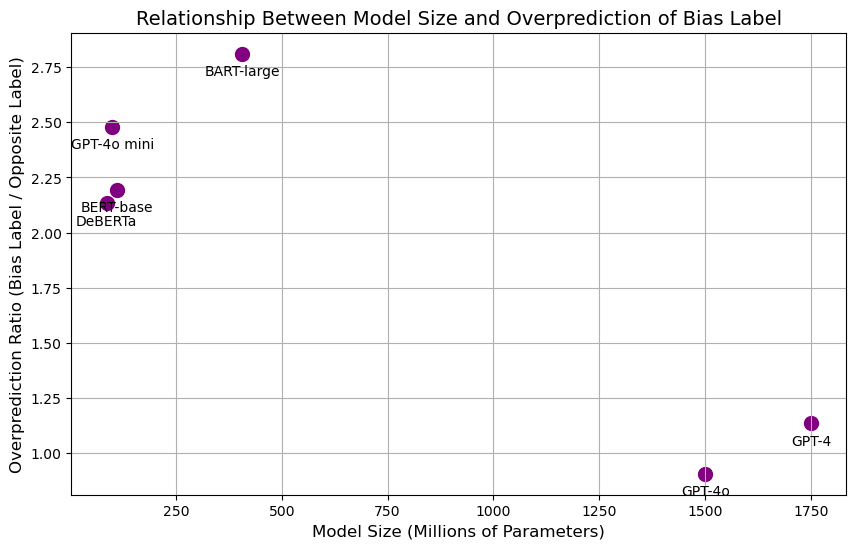

In [17]:
models = ["GPT-4", "GPT-4o", "GPT-4o mini", "BERT-base", "DeBERTa", "BART-large"]
model_sizes = [1750, 1500, 100, 110, 86, 406]  # in millions (approximate sizes for undisclosed GPT models)
biases = ["Liberal", "Liberal", "Liberal", "Conservative", "Conservative", "Liberal"]
liberal_predictions = [259, 242, 248, 216, 143, 461]
conservative_predictions = [228, 267, 100, 474, 305, 164]

overprediction_ratios = []
for i in range(len(models)):
    if biases[i] == "Liberal":
        ratio = liberal_predictions[i] / conservative_predictions[i]
    else:
        ratio = conservative_predictions[i] / liberal_predictions[i]
    overprediction_ratios.append(ratio)

plt.figure(figsize=(10, 6))
plt.scatter(model_sizes, overprediction_ratios, color='purple', s=100)
for i, model in enumerate(models):
    plt.text(model_sizes[i], overprediction_ratios[i] - 0.1, model, ha='center', fontsize=10)

plt.title("Relationship Between Model Size and Overprediction of Bias Label", fontsize=14)
plt.xlabel("Model Size (Millions of Parameters)", fontsize=12)
plt.ylabel("Overprediction Ratio (Bias Label / Opposite Label)", fontsize=12)
plt.grid(True)
plt.show()
